# 연구 목표
- 범죄 정보 도입
  - cctv와 인구에 대한 상관분석에서는 총 인구수에서 14% 연관성을 확인, 약한 상관관계
  - cctv의 본질적인 도입 이유는 범죄예방이라는 측면에서, 범죄정보를 도입하고 이를 통해 상관관계를 분석
  - cctv의 설치 위치, 범죄 발생 위치(장소, 건물, ...)가 어떤 상관성을 가졌는지 확장 可

# 데이터 확보
  - 서울열린데이터광장
  - 서울시 범죄 > 검색 > 서울시 5대범죄 발생현황, 서울시 5대범죄 발생장소 현황

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [ ]:
# 한글 처리 (구글링)
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# 모듈 가져오기
import numpy as np
import pandas as pd

In [ ]:
root_dir = '/content/drive/My Drive/Colab Notebooks/1_Analysis/data/'

In [ ]:
# crime_cnt_df 생성
path = root_dir +'crime_count_2014_2018.txt'
crime_cnt_df = pd.read_csv( path, sep='\t', encoding='utf-8' )
crime_cnt_df.head()

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2014,합계,"130,674","79,061",158,152,343,299,"5,462","4,957","59,393","19,120","65,318","54,533"
2,2014,종로구,"5,021","4,610",3,7,12,15,226,948,"2,272","1,281","2,508","2,359"
3,2014,중구,"5,231","3,188",6,5,13,13,221,161,"2,576",887,"2,415","2,122"
4,2014,용산구,"3,799","2,340",1,2,7,7,213,169,"1,560",522,"2,018","1,640"


In [ ]:
# crime_plc_df 생성
crime_cnt_df = pd.read_csv(root_dir + 'crime_place_2012_2018.txt', sep='\t', encoding='utf-8' )
crime_cnt_df.head()

,기간,구분,계,아파트 연립다세대,단독주택,노상,상점,숙박업소목욕탕,유흥접객업소,사무실,역대합실,교통수단,유원지,학교,금융기관,기타
0,2012,계,"137,725","5,375","6,874","28,387","5,000","3,990","7,353","2,668",939,"1,796",968,"1,308","1,314","71,753"
1,2012,살인,179,26,26,32,1,2,9,9,1,-,3,1,-,69
2,2012,강도,570,23,51,151,65,13,31,8,4,3,4,1,4,212
3,2012,강간강제추행,"4,908",306,387,743,44,511,279,77,101,460,43,18,1,"1,938"
4,2012,절도,"61,436","2,862","3,604","9,011","4,002","2,953","2,911","1,039",382,877,459,894,"1,257","31,185"


In [ ]:
# pop_cctv_df 생성
pop_cctv_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/1_Analysis/data/pop_cctv_mid_analysis.csv', encoding='utf-8')
pop_cctv_df.head(3)

,자치구,연도,세대수,총인구수,한국인,외국인,세대당인구,고령자(65),외국인비율,고령자비율,소계,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,증가분,오차율
0,종로구,2018,73735,163026,153065,9961,2.08,26742,6.110068,16.403518,1471,8.0,7.0,599.0,132,195,148,281,101,56.323061,67.114515
1,중구,2018,61502,135633,125725,9908,2.04,22005,7.305007,16.223928,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998,84.021380
2,용산구,2018,108974,245090,228999,16091,2.10,37640,6.565343,15.357624,2063,1279.0,152.0,201.0,107,102,89,60,73,12.058664,290.805827


In [ ]:
crime_cnt_df.shape

(42, 16)

In [ ]:
(25 + 1) * 5 + 1

131

In [ ]:
# 5대 범죄 목록
crime_big5_title = ['살인', '강도', '강간강제추행', '절도', '폭력']
crime_big5_title

['살인', '강도', '강간강제추행', '절도', '폭력']

In [ ]:
# crime_cnt_df (2)
path = root_dir +'crime_count_2014_2018.txt'
crime_cnt_df = pd.read_csv( path, sep='\t', encoding='utf-8', header = 1, usecols = [0,1,4,5,6,7,8,9,10,11,12,13] )
crime_cnt_df.head()

,기간,자치구,발생.1,검거.1,발생.2,검거.2,발생.3,검거.3,발생.4,검거.4,발생.5,검거.5
0,2014,합계,158,152,343,299,"5,462","4,957","59,393","19,120","65,318","54,533"
1,2014,종로구,3,7,12,15,226,948,"2,272","1,281","2,508","2,359"
2,2014,중구,6,5,13,13,221,161,"2,576",887,"2,415","2,122"
3,2014,용산구,1,2,7,7,213,169,"1,560",522,"2,018","1,640"
4,2014,성동구,1,1,5,6,141,103,"1,753",529,"1,682","1,409"


In [ ]:
# 컬러명 변경 → 의미 있게 처리 → 전체 변경 or 부분 변경
# "절도 발생", "절도 검거", 기간/자치구는 그대로 사용
crime_cnt_df.columns

Index(['기간', '자치구', '발생.1', '검거.1', '발생.2', '검거.2', '발생.3', '검거.3', '발생.4',
       '검거.4', '발생.5', '검거.5'],
      dtype='object')

In [ ]:
crime_cnt_df.columns = ['기간', '자치구', '살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간강제추행 발생', '강간강제추행 검거', '절도 발생', '절도 검거', '폭력 발생', '폭력 검거']
crime_cnt_df.head(3)

,기간,자치구,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2014,합계,158,152,343,299,"5,462","4,957","59,393","19,120","65,318","54,533"
1,2014,종로구,3,7,12,15,226,948,"2,272","1,281","2,508","2,359"
2,2014,중구,6,5,13,13,221,161,"2,576",887,"2,415","2,122"


In [ ]:
# 이중 리스트내포로 column명 생성
crime_big5_cate = ['발생','검거']
new_cols = ['기간', '자치구'] + [ f'{a} {b}' for a in crime_big5_title for b in crime_big5_cate ]
new_cols

['기간',
 '자치구',
 '살인 발생',
 '살인 검거',
 '강도 발생',
 '강도 검거',
 '강간강제추행 발생',
 '강간강제추행 검거',
 '절도 발생',
 '절도 검거',
 '폭력 발생',
 '폭력 검거']

In [ ]:
crime_cnt_df.columns = new_cols
crime_cnt_df.head()

,기간,자치구,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2014,합계,158,152,343,299,"5,462","4,957","59,393","19,120","65,318","54,533"
1,2014,종로구,3,7,12,15,226,948,"2,272","1,281","2,508","2,359"
2,2014,중구,6,5,13,13,221,161,"2,576",887,"2,415","2,122"
3,2014,용산구,1,2,7,7,213,169,"1,560",522,"2,018","1,640"
4,2014,성동구,1,1,5,6,141,103,"1,753",529,"1,682","1,409"


In [ ]:
crime_cnt_df.dtypes

기간            int64
자치구          object
살인 발생         int64
살인 검거        object
강도 발생         int64
강도 검거         int64
강간강제추행 발생    object
강간강제추행 검거    object
절도 발생        object
절도 검거        object
폭력 발생        object
폭력 검거        object
dtype: object

In [ ]:
# crime_cnt_df의 2018년 데이터 획득
# crime_cnt_df 데이터에서 기간 컬럼의 값이 2018인 데이터만 추출
crime_cnt_df_2018 = crime_cnt_df[ crime_cnt_df['기간'] == 2018 ]
crime_cnt_df_2018

,기간,자치구,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
104,2018,합계,143,139,143,151,"6,412","6,046","39,175","19,762","56,075","48,389"
105,2018,종로구,6,7,3,7,236,"1,100","1,483",969,"1,962","1,830"
106,2018,중구,2,2,11,11,207,115,"1,855",832,"1,955","1,719"
107,2018,용산구,1,1,3,2,331,285,"1,096",522,"1,980","1,733"
108,2018,성동구,2,2,5,8,126,102,999,487,"1,325","1,188"
109,2018,광진구,7,5,2,1,229,184,"1,769",974,"1,908","1,625"
110,2018,동대문구,2,2,5,4,145,112,"1,447",930,"2,081","1,920"
111,2018,중랑구,4,5,3,3,174,145,"1,526",876,"2,581","2,193"
112,2018,성북구,7,6,1,2,183,140,"1,164",635,"1,687","1,494"
113,2018,강북구,8,6,7,7,188,135,"1,112",603,"2,122","1,992"


In [ ]:
crime_cnt_df_2018.shape

(26, 12)

In [ ]:
# 수치 계산 위해 ,를 제거하고 int형으로 변경 필요
# 경찰서 정보 → 서울 + 자치구명(구는 제외) + 경찰서 ex) 서울종로경찰서
# 서울에 자치구별 경찰서가 반드시 1개는 아님. 여기서는 통합된 데이터를 제공함.
# 자치구 → 경찰서명 획득 → 카카오api → 주소, GPS 획득

In [ ]:
# 자치구 데이터만 획득
police_title = list()
for gu in crime_cnt_df_2018['자치구'][1:].values :
  # 서울종로경찰서를 동적으로 만들어서 출력
  if gu != '중구' : 
    police_title.append(f'서울{gu[:-1]}경찰서')
  else:
    police_title.append('서울중부경찰서')
police_title

['서울종로경찰서',
 '서울중부경찰서',
 '서울용산경찰서',
 '서울성동경찰서',
 '서울광진경찰서',
 '서울동대문경찰서',
 '서울중랑경찰서',
 '서울성북경찰서',
 '서울강북경찰서',
 '서울도봉경찰서',
 '서울노원경찰서',
 '서울은평경찰서',
 '서울서대문경찰서',
 '서울마포경찰서',
 '서울양천경찰서',
 '서울강서경찰서',
 '서울구로경찰서',
 '서울금천경찰서',
 '서울영등포경찰서',
 '서울동작경찰서',
 '서울관악경찰서',
 '서울서초경찰서',
 '서울강남경찰서',
 '서울송파경찰서',
 '서울강동경찰서']

In [ ]:
KAKAO_API_KEY = "ea6ae64692fc94aebea7ba2b61f3816a"
'''
curl -v -X GET "https://dapi.kakao.com/v2/local/search/keyword.json" --data-urlencode "query=서울종로경찰서" -H "Authorization: KakaoAK ea6ae64692fc94aebea7ba2b61f3816a"
'''

'\ncurl -v -X GET "https://dapi.kakao.com/v2/local/search/keyword.json" --data-urlencode "query=서울종로경찰서" -H "Authorization: KakaoAK ea6ae64692fc94aebea7ba2b61f3816a"\n'

In [ ]:
# 리눅스에서 직접 수행
!curl -v -X GET "https://dapi.kakao.com/v2/local/search/keyword.json" --data-urlencode "query=서울종로경찰서" -H "Authorization: KakaoAK ea6ae64692fc94aebea7ba2b61f3816a"

# {
#     "address_name":"서울 종로구 경운동 90-18",
#     "category_group_code":"PO3",
#     "category_group_name":"공공기관",
#     "category_name":"사회,공공기관 \u003e 행정기관 \u003e 경찰서",
#     "distance":"",
#     "id":"7935719",
#     "phone":"02-1566-0112",
#     "place_name":"서울종로경찰서",
#     "place_url":"http://place.map.kakao.com/7935719",
#     "road_address_name":"서울 종로구 율곡로 46",
#     "x":"126.98489861889408",
#     "y":"37.57553779077874"
# }

*   Trying 203.217.239.16...
* TCP_NODELAY set
* Connected to dapi.kakao.com (203.217.239.16) port 443 (#0)
* ALPN, offering h2
* ALPN, offering http/1.1
* successfully set certificate verify locations:
*   CAfile: /etc/ssl/certs/ca-certificates.crt
  CApath: /etc/ssl/certs
* TLSv1.3 (OUT), TLS handshake, Client hello (1):
* TLSv1.3 (IN), TLS handshake, Server hello (2):
* TLSv1.2 (IN), TLS handshake, Certificate (11):
* TLSv1.2 (IN), TLS handshake, Server key exchange (12):
* TLSv1.2 (IN), TLS handshake, Server finished (14):
* TLSv1.2 (OUT), TLS handshake, Client key exchange (16):
* TLSv1.2 (OUT), TLS change cipher, Client hello (1):
* TLSv1.2 (OUT), TLS handshake, Finished (20):
* TLSv1.2 (IN), TLS handshake, Finished (20):
* SSL connection using TLSv1.2 / ECDHE-RSA-AES256-GCM-SHA384
* ALPN, server accepted to use http/1.1
* Server certificate:
*  subject: C=KR; ST=Jeju-do; L=Jeju-si; O=Kakao Corp.; CN=*.kakao.com
*  start date: Jul  9 00:00:00 2018 GMT
*  expire date: Oct  8 12:00

- http://json.parser.online.fr/ 여기서 json 구조 확인
- 혹은 vs code에서 플러그인 설치해서 구조를 볼 수도 있음

In [ ]:
# 최소한 사용하기 직전에만 모듈 가져오기를 수행하면 됨 → 코드 어느 위치든 상관 X
# 맨 위에 있는 이유는 여러번 모듈 가져오기 할 필요 없어서임
import urllib.request
import os
import sys
import json

In [ ]:
target_url = "https://dapi.kakao.com/v2/local/search/keyword.json"
target_url

'https://dapi.kakao.com/v2/local/search/keyword.json'

In [ ]:
KAKAO_API = 'KakaoAK ea6ae64692fc94aebea7ba2b61f3816a'
KAKAO_API

'KakaoAK ea6ae64692fc94aebea7ba2b61f3816a'

In [ ]:
keyword = "서울종로경찰서"
keyword = urllib.parse.quote(keyword)
keyword

'%EC%84%9C%EC%9A%B8%EC%A2%85%EB%A1%9C%EA%B2%BD%EC%B0%B0%EC%84%9C'

In [ ]:
# target_url + '?query=' + keyword
f"{target_url}?query={keyword}"
# urlencoding 되서 %10... 이런식으로 나와야함

'https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EC%A2%85%EB%A1%9C%EA%B2%BD%EC%B0%B0%EC%84%9C'

In [ ]:
# 강의(2)
TARGET_URL = 'https://dapi.kakao.com/v2/local/search/keyword.json'
KAKAO_API  = 'KakaoAK 1ed434e007af776c226d7d0697cc0834'
# 함수화 
# 입력 : 검색어
# 출력 : addr,lng, lat
# 함수명 : getGpsByKeyword
def getGpsByKeyword( keyword ):  
  param    = f'{TARGET_URL}?query={ urllib.parse.quote(keyword) }'  
  request  = urllib.request.Request( param )  
  request.add_header('Authorization', KAKAO_API)  
  response = urllib.request.urlopen( request )  
  if response.getcode() == 200:    
    tmp = json.load(response)    
    addr,lng, lat = tmp['documents'][0]['address_name'], tmp['documents'][0]['x'], tmp['documents'][0]['y']
  else:
    # 통신 실패를 하면 세팅하는 기본값
    addr,lng, lat = ('', 0, 0)
  return addr,lng, lat

getGpsByKeyword( '서울중부경찰서' )

('서울 중구 저동2가 62-1', '126.98958691395208', '37.56361812722828')

In [ ]:
# 1, 요청객체 생성
request = urllib.request.Request( f"{target_url}?query={keyword}" )
# 2. 헤더에 키 설정
request.add_header('Authorization', KAKAO_API)
# 3. 통신
response = urllib.request.urlopen(request)
# 4. 통신 결과 확인 → 응답코드
if response.getcode() == 200 :
    tmp = json.load(response)
    print(tmp)
else :
    print('error code', response.getcode())

{'documents': [{'address_name': '서울 종로구 경운동 90-18', 'category_group_code': 'PO3', 'category_group_name': '공공기관', 'category_name': '사회,공공기관 > 행정기관 > 경찰서', 'distance': '', 'id': '7935719', 'phone': '02-1566-0112', 'place_name': '서울종로경찰서', 'place_url': 'http://place.map.kakao.com/7935719', 'road_address_name': '서울 종로구 율곡로 46', 'x': '126.98489861889408', 'y': '37.57553779077874'}, {'address_name': '서울 종로구 인의동 48-57', 'category_group_code': 'PO3', 'category_group_name': '공공기관', 'category_name': '사회,공공기관 > 행정기관 > 경찰서', 'distance': '', 'id': '12448216', 'phone': '02-762-0112', 'place_name': '서울혜화경찰서', 'place_url': 'http://place.map.kakao.com/12448216', 'road_address_name': '서울 종로구 창경궁로 112-16', 'x': '126.998935936567', 'y': '37.5718915247338'}, {'address_name': '서울 종로구 경운동 90-18', 'category_group_code': '', 'category_group_name': '', 'category_name': '사회,공공기관 > 행정기관부속시설', 'distance': '', 'id': '9423294', 'phone': '02-3701-4228', 'place_name': '서울종로경찰서 112상황실', 'place_url': 'http://place.map.k

In [ ]:
# 검색 결과 중 첫번재 결과만 취해서 addr, lat, lng라는 변수에 값을 담고 출력
# 실습(1)
dt = []
dt.append({
    'addr' : tmp['documents'][0]['address_name'], 
    'lat' : tmp['documents'][0]['y'], 
    'lng' : tmp['documents'][0]['x']
    })
print(dt)

[{'addr': '서울 종로구 경운동 90-18', 'lat': '37.57553779077874', 'lng': '126.98489861889408'}]


In [ ]:
# 실습(2)
for document in tmp['documents'] :
  addr = document['address_name']
  lat = document['y']
  lng = document['x']
  print(addr, lat, lng)
  break

서울 종로구 경운동 90-18 37.57553779077874 126.98489861889408


In [ ]:
# 강의
addr,lng, lat = tmp['documents'][0]['address_name'], tmp['documents'][0]['x'], tmp['documents'][0]['y']
addr,lng, lat

('서울 종로구 경운동 90-18', '126.98489861889408', '37.57553779077874')

In [ ]:
# 함수화
# 입력 : 검색어
# 출력 : addr, lng, lat
# 함수명 : getGpsByKeyword
# 실습
target_url = "https://dapi.kakao.com/v2/local/search/keyword.json"

def getGpsByKeyword(keyword) :
  keyword = urllib.parse.quote(keyword)
  request = urllib.request.Request( f"{target_url}?query={keyword}" )
  request.add_header('Authorization', KAKAO_API)
  response = urllib.request.urlopen(request)
  tmp = json.load(response)
  addr,lng, lat = tmp['documents'][0]['address_name'], tmp['documents'][0]['x'], tmp['documents'][0]['y']
  return addr, lng, lat

# a = input()
# print(getGpsByKeyword(a))
print(getGpsByKeyword('서울중부경찰서'))

('서울 중구 저동2가 62-1', '126.98958691395208', '37.56361812722828')


In [ ]:
# 강의(1)
TARGET_URL = "https://dapi.kakao.com/v2/local/search/keyword.json"
KAKAO_API = 'KakaoAK ea6ae64692fc94aebea7ba2b61f3816a'

def getGpsByKeyword( keyword = "서울종로경찰서" ) :
  request = urllib.request.Request( f"{ TARGET_URL }?query={ urllib.parse.quote(keyword) }" )
  request.add_header('Authorization', KAKAO_API)
  response = urllib.request.urlopen(request)
  if response.getcode() == 200 :
    tmp = json.load(response)
    addr,lng, lat = tmp['documents'][0]['address_name'], tmp['documents'][0]['x'], tmp['documents'][0]['y']
  else :
    # 통신 실패하면 세팅하는 기본값
    addr,lng, lat = ('', 0, 0)
  return addr, lng, lat

getGpsByKeyword('서울중부경찰서')

('서울 중구 저동2가 62-1', '126.98958691395208', '37.56361812722828')

In [ ]:
# 일단 drive > data에 저장해두긴 함
# 쓸 때는 메인으로 끌고 와서 쓰기(drive, sample_data 있는 화면으로)
import gps_detect as gd

In [ ]:
from tqdm import tqdm_notebook

# 주소, gps 정보 추출(카카오api)

addrs, lngs, lats = list(), list(), list()

for n in tqdm_notebook(police_title) :
  # 1. 카카오에 검색어를 넣어서 주소와 gps를 구하는 쿼리 준비
  # dev.kakao.com > Rest API key : ea6ae64692fc94aebea7ba2b61f3816a
  # 2. 통신
  # 3. 응답
  # 4. json 파싱
  # 5. 주소와 lat, lng 정보 추출
  addr, lng, lat = gd.getGpsByKeyword( n )
  # 6. 적재(적당한 자료구조 → 리스트 or 딕셔너리)
  addrs.append(addr)
  lngs.append(lng)
  lats.append(lat)
  # crime_cnt_df_2018에 컬럼명 = 주소, 위도, 경도라는 이름으로 데이터를 추가
  # print(n, addrs, lngs, lats)
  # break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [ ]:
addrs, lngs, lats

(['서울 종로구 경운동 90-18',
  '서울 중구 저동2가 62-1',
  '서울 용산구 원효로1가 12-12',
  '서울 성동구 행당동 192-8',
  '서울 광진구 구의동 254-32',
  '서울 동대문구 청량리동 229',
  '서울 중랑구 신내동 810',
  '서울 성북구 삼선동5가 301',
  '서울 강북구 번동 415-15',
  '서울 도봉구 창동 17',
  '서울 노원구 하계동 250',
  '서울 은평구 불광동 산 24',
  '서울 서대문구 미근동 165',
  '서울 마포구 아현동 618-1',
  '서울 양천구 신정동 321',
  '서울 양천구 신월동 25',
  '서울 구로구 구로동 436',
  '서울 금천구 시흥동 1030',
  '서울 영등포구 당산동3가 2-11',
  '서울 동작구 노량진동 72-35',
  '서울 관악구 봉천동 1695-5',
  '서울 서초구 서초동 1726-1',
  '서울 강남구 대치동 998',
  '서울 송파구 가락동 9',
  '서울 강동구 성내동 541-1'],
 ['126.98489861889408',
  '126.98958691395208',
  '126.96777437089538',
  '127.036472076258',
  '127.08396170505674',
  '127.045762797538',
  '127.10454224897',
  '127.01625465308534',
  '127.02733870040592',
  '127.05270598499145',
  '127.071404832413',
  '126.928631038584',
  '126.966790740735',
  '126.95394117396',
  '126.865542970902',
  '126.829985881518',
  '126.886660285169',
  '126.89674921449215',
  '126.90094457988',
  '126.942857105642',
  '126.951062

In [ ]:
crime_cnt_df_2018.head(3)

,기간,자치구,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
104,2018,합계,143,139,143,151,"6,412","6,046","39,175","19,762","56,075","48,389"
105,2018,종로구,6,7,3,7,236,"1,100","1,483",969,"1,962","1,830"
106,2018,중구,2,2,11,11,207,115,"1,855",832,"1,955","1,719"


In [ ]:
# 컬럼 추가
# 합계를 제외하고 추출하여 아래 컬럼을 추가하시오
# 실습
tmp = crime_cnt_df_2018[1:]
tmp['경찰서명'] = police_title
tmp['주소'] = addrs
tmp['위도'] = lats
tmp['경도'] = lngs
tmp.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

(25, 16)

In [ ]:
# 일반 인덱싱
crime_cnt_df_2018[ 1:].shape
# loc
crime_cnt_df_2018.loc[ 104: , :].shape
# iloc
crime_cnt_df_2018.iloc[ 1: , : ].shape

(25, 12)

In [ ]:
# 합계를 제외하고 추출하여 아래 컬럼을 추가하시오
# 강의
crime_cnt_df_2018_25 = crime_cnt_df_2018[ 1:]

# 컬럼 추가
crime_cnt_df_2018_25['주소'] = addrs
crime_cnt_df_2018_25['위도'] = lats
crime_cnt_df_2018_25['경도'] = lngs
crime_cnt_df_2018_25['경찰서명'] = police_title

crime_cnt_df_2018_25.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

(25, 16)

In [ ]:
crime_cnt_df_2018_25.columns

Index(['기간', '자치구', '살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간강제추행 발생',
       '강간강제추행 검거', '절도 발생', '절도 검거', '폭력 발생', '폭력 검거', '주소', '위도', '경도',
       '경찰서명'],
      dtype='object')

In [ ]:
crime_cnt_df_2018_25.dtypes

기간            int64
자치구          object
살인 발생         int64
살인 검거        object
강도 발생         int64
강도 검거         int64
강간강제추행 발생    object
강간강제추행 검거    object
절도 발생        object
절도 검거        object
폭력 발생        object
폭력 검거        object
주소           object
위도           object
경도           object
경찰서명         object
dtype: object

In [ ]:
# 콤마를 제거하고 순수정수값으로 바꿔야할 대상 컬럼 획득
# 방법(1)
target_cols = crime_cnt_df_2018_25.select_dtypes( include = 'object' ).iloc[ : , 1 : 1+7 ].columns
target_cols

Index(['살인 검거', '강간강제추행 발생', '강간강제추행 검거', '절도 발생', '절도 검거', '폭력 발생', '폭력 검거'], dtype='object')

In [ ]:
# 방법(2)
crime_cnt_df_2018_25.select_dtypes( include = 'object' ).columns[ 1 : 1+7 ]

Index(['살인 검거', '강간강제추행 발생', '강간강제추행 검거', '절도 발생', '절도 검거', '폭력 발생', '폭력 검거'], dtype='object')

In [ ]:
def changeIntStr( x ):  
  return int(x.replace(',',''))

In [ ]:
# 대상 컬럼에서 하나씩 컬러명 추출
for col in target_cols :
  # 대상 데이터 획득
  target_data = crime_cnt_df_2018_25[col]
  # 데이터를 하나씩 뽑아서 , 제거 / 정수 처리
  crime_cnt_df_2018_25[col] = target_data.apply( changeIntStr )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
crime_cnt_df_2018_25.dtypes

기간            int64
자치구          object
살인 발생         int64
살인 검거         int64
강도 발생         int64
강도 검거         int64
강간강제추행 발생     int64
강간강제추행 검거     int64
절도 발생         int64
절도 검거         int64
폭력 발생         int64
폭력 검거         int64
주소           object
위도           object
경도           object
경찰서명         object
dtype: object

In [ ]:
# 검거율!! → '절도 검거' / '절도 발생' * 100
# 5대범죄에 대한 검거율 파생 변수 추가 → '절도검거율'
# 5개 컬럼 삭제 → '절도 검거'
crime_cnt_df_2018_25['살인검거율'] = crime_cnt_df_2018_25['살인 검거'] / crime_cnt_df_2018_25['살인 발생'] * 100
crime_cnt_df_2018_25['강도검거율'] = crime_cnt_df_2018_25['강도 검거'] / crime_cnt_df_2018_25['강도 발생'] * 100
crime_cnt_df_2018_25['강간강제추행검거율'] = crime_cnt_df_2018_25['강간강제추행 검거'] / crime_cnt_df_2018_25['강간강제추행 발생'] * 100
crime_cnt_df_2018_25['절도검거율'] = crime_cnt_df_2018_25['절도 검거'] / crime_cnt_df_2018_25['절도 발생'] * 100
crime_cnt_df_2018_25['폭력검거율'] = crime_cnt_df_2018_25['폭력 검거'] / crime_cnt_df_2018_25['폭력 발생'] * 100
crime_cnt_df_2018_25.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,기간,자치구,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,주소,위도,경도,경찰서명,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
105,2018,종로구,6,7,3,7,236,1100,1483,969,1962,1830,서울 종로구 경운동 90-18,37.57553779077874,126.98489861889408,서울종로경찰서,116.666667,233.333333,466.101695,65.340526,93.272171
106,2018,중구,2,2,11,11,207,115,1855,832,1955,1719,서울 중구 저동2가 62-1,37.56361812722828,126.98958691395208,서울중부경찰서,100.000000,100.000000,55.555556,44.851752,87.928389


In [ ]:
crime_cnt_df_2018_25.iloc[ : , [1, -5, -4, -3, -2, -1] ]
# 데이터의 최소값과 최대값의 거리가 큰 것으로 보임 → 최소 최대 구해서 확인

,자치구,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
105,종로구,116.666667,233.333333,466.101695,65.340526,93.272171
106,중구,100.000000,100.000000,55.555556,44.851752,87.928389
107,용산구,100.000000,66.666667,86.102719,47.627737,87.525253
108,성동구,100.000000,160.000000,80.952381,48.748749,89.660377
109,광진구,71.428571,50.000000,80.349345,55.059356,85.167715
110,동대문구,100.000000,80.000000,77.241379,64.270905,92.263335
111,중랑구,125.000000,100.000000,83.333333,57.404980,84.967067
112,성북구,85.714286,200.000000,76.502732,54.553265,88.559573
113,강북구,75.000000,100.000000,71.808511,54.226619,93.873704
114,도봉구,100.000000,60.000000,103.539823,55.185659,83.320979


In [ ]:
crime_cnt_df_2018_25.iloc[ : , [1, -5, -4, -3, -2, -1] ].describe()
# 통계 요약을 살펴보니 최소와 최대 간의 값의 차이가 큼 → 분석겨로가, 예측결과가 떨어질 것
# 데이터 준비 과정의 포인트는 품질 향상 → 정규화 처리 → 값을 0과 1 사이로 배치

,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,100.154520,114.085714,96.551492,51.322266,86.454684
std,17.814526,64.698983,77.855557,6.885525,3.466608
min,71.428571,50.000000,53.472222,41.139241,80.930537
25%,88.235294,80.000000,76.502732,45.835760,84.127698
50%,100.000000,100.000000,83.720930,50.495050,85.167715
75%,100.000000,116.666667,89.893617,55.185659,88.368794
max,150.000000,350.000000,466.101695,65.340526,93.873704


In [ ]:
# 검거율이 들어간 컬럼들 중에서 100이 넘는 데이터는 모조리 100으로 맞추기
# 대상 컬럼명
for col in crime_cnt_df_2018_25.columns[  -5 : ] :
  # 1치원 자리에서는 해당 컬럼값을 추출(Series)해서 100과 비교 → 참/거짓
  # 2차원 자리에서는 대상 컬럼을 지정( loc이므로 컬럼명 그대로 사용 )
  crime_cnt_df_2018_25.loc[ crime_cnt_df_2018_25[col] > 100 , col ] = 100
crime_cnt_df_2018_25.iloc[ : , [1, -5, -4, -3, -2, -1] ]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,자치구,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
105,종로구,100.000000,100.000000,100.000000,65.340526,93.272171
106,중구,100.000000,100.000000,55.555556,44.851752,87.928389
107,용산구,100.000000,66.666667,86.102719,47.627737,87.525253
108,성동구,100.000000,100.000000,80.952381,48.748749,89.660377
109,광진구,71.428571,50.000000,80.349345,55.059356,85.167715
110,동대문구,100.000000,80.000000,77.241379,64.270905,92.263335
111,중랑구,100.000000,100.000000,83.333333,57.404980,84.967067
112,성북구,85.714286,100.000000,76.502732,54.553265,88.559573
113,강북구,75.000000,100.000000,71.808511,54.226619,93.873704
114,도봉구,100.000000,60.000000,100.000000,55.185659,83.320979


In [ ]:
crime_cnt_df_2018_25.loc[ crime_cnt_df_2018_25['절도검거율'] > 55 , : ].iloc[ : , -5: ]

,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
105,100.000000,100.000000,100.000000,65.340526,93.272171
109,71.428571,50.000000,80.349345,55.059356,85.167715
110,100.000000,80.000000,77.241379,64.270905,92.263335
111,100.000000,100.000000,83.333333,57.404980,84.967067
114,100.000000,60.000000,100.000000,55.185659,83.320979
116,100.000000,100.000000,89.893617,63.849765,88.368794
117,80.000000,100.000000,91.747573,55.084746,80.930537
120,81.818182,50.000000,91.449814,56.960557,85.108820
122,100.000000,85.714286,92.500000,55.222603,90.219665


In [ ]:
# 추출할 컬럼
# 검거율 5개, 발생 5개, 자치구 / 총인구수, 소계(cctv총수)
crime2018 = crime_cnt_df_2018_25.iloc[ :, [1, 2, 4, 6, 8, 10, -5, -4, -3, -2, -1] ]
crime2018

,자치구,살인 발생,강도 발생,강간강제추행 발생,절도 발생,폭력 발생,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
105,종로구,6,3,236,1483,1962,100.000000,100.000000,100.000000,65.340526,93.272171
106,중구,2,11,207,1855,1955,100.000000,100.000000,55.555556,44.851752,87.928389
107,용산구,1,3,331,1096,1980,100.000000,66.666667,86.102719,47.627737,87.525253
108,성동구,2,5,126,999,1325,100.000000,100.000000,80.952381,48.748749,89.660377
109,광진구,7,2,229,1769,1908,71.428571,50.000000,80.349345,55.059356,85.167715
110,동대문구,2,5,145,1447,2081,100.000000,80.000000,77.241379,64.270905,92.263335
111,중랑구,4,3,174,1526,2581,100.000000,100.000000,83.333333,57.404980,84.967067
112,성북구,7,1,183,1164,1687,85.714286,100.000000,76.502732,54.553265,88.559573
113,강북구,8,7,188,1112,2122,75.000000,100.000000,71.808511,54.226619,93.873704
114,도봉구,1,5,113,781,1349,100.000000,60.000000,100.000000,55.185659,83.320979


In [ ]:
tmp = pop_cctv_df.loc[ : , ['자치구', '총인구수', '소계']]
tmp

,자치구,총인구수,소계
0,종로구,163026,1471
1,중구,135633,1544
2,용산구,245090,2063
3,성동구,316463,2679
4,광진구,371063,1581
5,동대문구,364338,2003
6,중랑구,408147,1068
7,성북구,447687,3003
8,강북구,322915,1265
9,도봉구,341649,858


In [ ]:
# crime2018 + tmp를 합쳐서 하나의 df로 구성하시오 → 병합
# 실습
pd.merge(tmp, crime2018, on = "자치구")

,자치구,총인구수,소계,살인 발생,강도 발생,강간강제추행 발생,절도 발생,폭력 발생,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
0,종로구,163026,1471,6,3,236,1483,1962,100.000000,100.000000,100.000000,65.340526,93.272171
1,중구,135633,1544,2,11,207,1855,1955,100.000000,100.000000,55.555556,44.851752,87.928389
2,용산구,245090,2063,1,3,331,1096,1980,100.000000,66.666667,86.102719,47.627737,87.525253
3,성동구,316463,2679,2,5,126,999,1325,100.000000,100.000000,80.952381,48.748749,89.660377
4,광진구,371063,1581,7,2,229,1769,1908,71.428571,50.000000,80.349345,55.059356,85.167715
5,동대문구,364338,2003,2,5,145,1447,2081,100.000000,80.000000,77.241379,64.270905,92.263335
6,중랑구,408147,1068,4,3,174,1526,2581,100.000000,100.000000,83.333333,57.404980,84.967067
7,성북구,447687,3003,7,1,183,1164,1687,85.714286,100.000000,76.502732,54.553265,88.559573
8,강북구,322915,1265,8,7,188,1112,2122,75.000000,100.000000,71.808511,54.226619,93.873704
9,도봉구,341649,858,1,5,113,781,1349,100.000000,60.000000,100.000000,55.185659,83.320979


In [ ]:
#################### 여기서부터 재실행

In [ ]:
# 강의
# crime2018DF = pd.merge( crime2018, tmp )
crime2018DF.head()

,자치구,살인 발생,강도 발생,강간강제추행 발생,절도 발생,폭력 발생,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,총인구수,소계
0,종로구,6,3,236,1483,1962,100.000000,100.000000,100.000000,65.340526,93.272171,163026,1471
1,중구,2,11,207,1855,1955,100.000000,100.000000,55.555556,44.851752,87.928389,135633,1544
2,용산구,1,3,331,1096,1980,100.000000,66.666667,86.102719,47.627737,87.525253,245090,2063
3,성동구,2,5,126,999,1325,100.000000,100.000000,80.952381,48.748749,89.660377,316463,2679
4,광진구,7,2,229,1769,1908,71.428571,50.000000,80.349345,55.059356,85.167715,371063,1581


#### 정규화

In [ ]:
crime2018DF.describe()
# 기초 통계를 보고 발생 컬럼들 사이에 편차가 大 → 같은 구간으로 정규화 처리 수행
# 동일 구간(0 ~ 1)으로 전처리 수행해 비교/분석 수행
# 0 ~ 1 : 정규화 작업 → 최대값 기준(Max), 최소~최대 기준(MinMaxAcaler), 개별값/전체의 합산(지분, softmax, StandardScaler)

,살인 발생,강도 발생,강간강제추행 발생,절도 발생,폭력 발생,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,총인구수,소계
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,5.720000,5.720000,256.480000,1567.000000,2243.000000,94.487853,89.552381,81.765831,51.322266,86.454684,401984.280000,2219.720000
std,3.668787,3.102687,122.166594,505.650818,600.349829,9.475409,17.112009,11.933686,6.885525,3.466608,127293.343035,967.646523
min,1.000000,1.000000,113.000000,781.000000,1325.000000,71.428571,50.000000,53.472222,41.139241,80.930537,135633.000000,858.000000
25%,3.000000,3.000000,183.000000,1164.000000,1912.000000,88.235294,80.000000,76.502732,45.835760,84.127698,323080.000000,1586.000000
50%,5.000000,5.000000,207.000000,1483.000000,2115.000000,100.000000,100.000000,83.720930,50.495050,85.167715,408147.000000,1935.000000
75%,8.000000,7.000000,309.000000,1851.000000,2619.000000,100.000000,100.000000,89.893617,55.185659,88.368794,468145.000000,2775.000000
max,17.000000,14.000000,600.000000,3004.000000,3885.000000,100.000000,100.000000,100.000000,65.340526,93.873704,673507.000000,5221.000000


In [ ]:
# 머신러닝에서 제공하는 전처리기를 사용
from sklearn import preprocessing

In [ ]:
# 생성
scaler = preprocessing.MinMaxScaler()

In [ ]:
# 대상 컬럼
cols = crime2018DF.columns[1:1+5]
cols

Index(['살인 발생', '강도 발생', '강간강제추행 발생', '절도 발생', '폭력 발생'], dtype='object')

In [ ]:
# 전처리의 대상이 되는 전체값 획득 → 타입 : 배열, 2-D array
# 컬럼들 중에 발생이 들어간 항목만 대상, 총 5건
X = crime2018DF[ cols ].values
X[:3]

array([[   6,    3,  236, 1483, 1962],
       [   2,   11,  207, 1855, 1955],
       [   1,    3,  331, 1096, 1980]])

In [ ]:
# 구간을 계산하기 위해 데이터를 넣어서 훈련시킴
preprocess_X = scaler.fit_transform( X.astype(float) )
preprocess_X

array([[0.3125    , 0.15384615, 0.25256674, 0.31578947, 0.24882813],
       [0.0625    , 0.76923077, 0.19301848, 0.4831309 , 0.24609375],
       [0.        , 0.15384615, 0.4476386 , 0.1417004 , 0.25585938],
       [0.0625    , 0.30769231, 0.02669405, 0.09806568, 0.        ],
       [0.375     , 0.07692308, 0.23819302, 0.44444444, 0.22773438],
       [0.0625    , 0.30769231, 0.06570842, 0.29959514, 0.2953125 ],
       [0.1875    , 0.15384615, 0.12525667, 0.3351327 , 0.490625  ],
       [0.375     , 0.        , 0.14373717, 0.1722897 , 0.14140625],
       [0.4375    , 0.46153846, 0.15400411, 0.14889789, 0.31132813],
       [0.        , 0.30769231, 0.        , 0.        , 0.009375  ],
       [0.25      , 0.30769231, 0.16632444, 0.28834908, 0.4125    ],
       [0.4375    , 0.        , 0.15400411, 0.22357175, 0.30859375],
       [0.25      , 0.15384615, 0.19096509, 0.12640576, 0.07851562],
       [0.3125    , 0.38461538, 0.73921971, 0.55330634, 0.52773438],
       [0.0625    , 0.23076923, 0.

In [ ]:
# 발생이라는 항목에 preprocess_X값 세팅 → 값을 덮거나 df를 새로 만들거나
crime2018DF[ cols ] = preprocess_X
crime2018DF

,자치구,살인 발생,강도 발생,강간강제추행 발생,절도 발생,폭력 발생,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,총인구수,소계
0,종로구,0.3125,0.153846,0.252567,0.315789,0.248828,100.000000,100.000000,100.000000,65.340526,93.272171,163026,1471
1,중구,0.0625,0.769231,0.193018,0.483131,0.246094,100.000000,100.000000,55.555556,44.851752,87.928389,135633,1544
2,용산구,0.0000,0.153846,0.447639,0.141700,0.255859,100.000000,66.666667,86.102719,47.627737,87.525253,245090,2063
3,성동구,0.0625,0.307692,0.026694,0.098066,0.000000,100.000000,100.000000,80.952381,48.748749,89.660377,316463,2679
4,광진구,0.3750,0.076923,0.238193,0.444444,0.227734,71.428571,50.000000,80.349345,55.059356,85.167715,371063,1581
5,동대문구,0.0625,0.307692,0.065708,0.299595,0.295313,100.000000,80.000000,77.241379,64.270905,92.263335,364338,2003
6,중랑구,0.1875,0.153846,0.125257,0.335133,0.490625,100.000000,100.000000,83.333333,57.404980,84.967067,408147,1068
7,성북구,0.3750,0.000000,0.143737,0.172290,0.141406,85.714286,100.000000,76.502732,54.553265,88.559573,447687,3003
8,강북구,0.4375,0.461538,0.154004,0.148898,0.311328,75.000000,100.000000,71.808511,54.226619,93.873704,322915,1265
9,도봉구,0.0000,0.307692,0.000000,0.000000,0.009375,100.000000,60.000000,100.000000,55.185659,83.320979,341649,858


In [ ]:
# 1. 발생 관련 5건을 합산해서 "범죄"라는 컬럼명으로 추가
# 2. 검거율 관련 5건을 합산해서 "검거" 컬럼명으로 추가
# 3. 자치구를 인덱스로 재배치
# 4. 컬럼명 발생 관련 5건의 이름 변경 : "살인 발생" → "살인"

In [ ]:
# 실습
np.sum(crime2018DF.loc[ :, "살인 발생" : "폭력 발생" ], axis = 1)

0     1.283530
1     1.753974
2     0.999045
3     0.494952
4     1.362295
5     1.030808
6     1.292361
7     0.832433
8     1.513269
9     0.317067
10    1.424866
11    1.123670
12    0.799733
13    2.517376
14    0.844523
15    2.259614
16    2.341580
17    1.356069
18    3.494875
19    1.239667
20    2.751667
21    2.190052
22    4.562500
23    2.450813
24    1.384938
dtype: float64

In [ ]:
# 실습
# crime2018DF[ "범죄" ] = np.sum(crime2018DF.loc[ :, "살인 발생" : "폭력 발생" ], axis = 1)
# crime2018DF.head()

# 강의
crime2018DF[ "범죄" ] = np.sum(crime2018DF[ cols ], axis = 1)
crime2018DF.head()

,자치구,살인 발생,강도 발생,강간강제추행 발생,절도 발생,폭력 발생,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,총인구수,소계,범죄
0,종로구,0.3125,0.153846,0.252567,0.315789,0.248828,100.000000,100.000000,100.000000,65.340526,93.272171,163026,1471,1.283530
1,중구,0.0625,0.769231,0.193018,0.483131,0.246094,100.000000,100.000000,55.555556,44.851752,87.928389,135633,1544,1.753974
2,용산구,0.0000,0.153846,0.447639,0.141700,0.255859,100.000000,66.666667,86.102719,47.627737,87.525253,245090,2063,0.999045
3,성동구,0.0625,0.307692,0.026694,0.098066,0.000000,100.000000,100.000000,80.952381,48.748749,89.660377,316463,2679,0.494952
4,광진구,0.3750,0.076923,0.238193,0.444444,0.227734,71.428571,50.000000,80.349345,55.059356,85.167715,371063,1581,1.362295


In [ ]:
# 실습
# crime2018DF[ "검거" ] = np.sum(crime2018DF.loc[ :, "살인검거율" : "폭력검거율" ], axis = 1)
# crime2018DF.head()

# 강의
cols = ["살인검거율",	"강도검거율",	"강간강제추행검거율",	"절도검거율", '폭력검거율']
crime2018DF[ "검거" ] = np.sum(crime2018DF[ cols ], axis = 1)
crime2018DF.head()

,자치구,살인 발생,강도 발생,강간강제추행 발생,절도 발생,폭력 발생,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,총인구수,소계,범죄,검거
0,종로구,0.3125,0.153846,0.252567,0.315789,0.248828,100.000000,100.000000,100.000000,65.340526,93.272171,163026,1471,1.283530,458.612697
1,중구,0.0625,0.769231,0.193018,0.483131,0.246094,100.000000,100.000000,55.555556,44.851752,87.928389,135633,1544,1.753974,388.335696
2,용산구,0.0000,0.153846,0.447639,0.141700,0.255859,100.000000,66.666667,86.102719,47.627737,87.525253,245090,2063,0.999045,387.922375
3,성동구,0.0625,0.307692,0.026694,0.098066,0.000000,100.000000,100.000000,80.952381,48.748749,89.660377,316463,2679,0.494952,419.361507
4,광진구,0.3750,0.076923,0.238193,0.444444,0.227734,71.428571,50.000000,80.349345,55.059356,85.167715,371063,1581,1.362295,342.004987


In [ ]:
# 실습 = 강의
crime2018DF.set_index('자치구', inplace=True)
crime2018DF.head()

,살인 발생,강도 발생,강간강제추행 발생,절도 발생,폭력 발생,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,총인구수,소계,범죄,검거
자치구,,,,,,,,,,,,,,
종로구,0.3125,0.153846,0.252567,0.315789,0.248828,100.000000,100.000000,100.000000,65.340526,93.272171,163026,1471,1.283530,458.612697
중구,0.0625,0.769231,0.193018,0.483131,0.246094,100.000000,100.000000,55.555556,44.851752,87.928389,135633,1544,1.753974,388.335696
용산구,0.0000,0.153846,0.447639,0.141700,0.255859,100.000000,66.666667,86.102719,47.627737,87.525253,245090,2063,0.999045,387.922375
성동구,0.0625,0.307692,0.026694,0.098066,0.000000,100.000000,100.000000,80.952381,48.748749,89.660377,316463,2679,0.494952,419.361507
광진구,0.3750,0.076923,0.238193,0.444444,0.227734,71.428571,50.000000,80.349345,55.059356,85.167715,371063,1581,1.362295,342.004987


In [ ]:
crime2018DF.columns[4]

'폭력 발생'

In [ ]:
# 실습 = 강의
dic  = {
    crime2018DF.columns[0]:'살인',
    crime2018DF.columns[1]:'강도',
    crime2018DF.columns[2]:'강간강제추행',
    crime2018DF.columns[3]:'절도',
    crime2018DF.columns[4]:'폭력'
}
crime2018DF.rename( columns=dic, inplace=True )
crime2018DF.head(3)

# 후에 딕셔너리 내포를 통해 구현 dic = { 키 : 키를전처리 for 값 in 덩어리 }

,살인,강도,강간강제추행,절도,폭력,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,총인구수,소계,범죄,검거
자치구,,,,,,,,,,,,,,
종로구,0.3125,0.153846,0.252567,0.315789,0.248828,100.0,100.000000,100.000000,65.340526,93.272171,163026,1471,1.283530,458.612697
중구,0.0625,0.769231,0.193018,0.483131,0.246094,100.0,100.000000,55.555556,44.851752,87.928389,135633,1544,1.753974,388.335696
용산구,0.0000,0.153846,0.447639,0.141700,0.255859,100.0,66.666667,86.102719,47.627737,87.525253,245090,2063,0.999045,387.922375


In [ ]:
crime2018DF['범죄']

자치구
종로구     1.283530
중구      1.753974
용산구     0.999045
성동구     0.494952
광진구     1.362295
동대문구    1.030808
중랑구     1.292361
성북구     0.832433
강북구     1.513269
도봉구     0.317067
노원구     1.424866
은평구     1.123670
서대문구    0.799733
마포구     2.517376
양천구     0.844523
강서구     2.259614
구로구     2.341580
금천구     1.356069
영등포구    3.494875
동작구     1.239667
관악구     2.751667
서초구     2.190052
강남구     4.562500
송파구     2.450813
강동구     1.384938
Name: 범죄, dtype: float64

In [ ]:
# 범죄의 최대치가 5.0이므로 이를 기준으로 정규화 처리 수행
crime2018DF['범죄'] = crime2018DF['범죄'] / 5.0
crime2018DF.head()

,살인,강도,강간강제추행,절도,폭력,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,총인구수,소계,범죄,검거
자치구,,,,,,,,,,,,,,
종로구,0.3125,0.153846,0.252567,0.315789,0.248828,100.000000,100.000000,100.000000,65.340526,93.272171,163026,1471,0.256706,458.612697
중구,0.0625,0.769231,0.193018,0.483131,0.246094,100.000000,100.000000,55.555556,44.851752,87.928389,135633,1544,0.350795,388.335696
용산구,0.0000,0.153846,0.447639,0.141700,0.255859,100.000000,66.666667,86.102719,47.627737,87.525253,245090,2063,0.199809,387.922375
성동구,0.0625,0.307692,0.026694,0.098066,0.000000,100.000000,100.000000,80.952381,48.748749,89.660377,316463,2679,0.098990,419.361507
광진구,0.3750,0.076923,0.238193,0.444444,0.227734,71.428571,50.000000,80.349345,55.059356,85.167715,371063,1581,0.272459,342.004987


In [ ]:
# 범죄의 최대치가 500.0이므로 이를 기준으로 정규화 처리 수행
crime2018DF['검거'] = crime2018DF['검거'] / 500.0
crime2018DF.head()

,살인,강도,강간강제추행,절도,폭력,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,총인구수,소계,범죄,검거
자치구,,,,,,,,,,,,,,
종로구,0.3125,0.153846,0.252567,0.315789,0.248828,100.000000,100.000000,100.000000,65.340526,93.272171,163026,1471,0.256706,0.917225
중구,0.0625,0.769231,0.193018,0.483131,0.246094,100.000000,100.000000,55.555556,44.851752,87.928389,135633,1544,0.350795,0.776671
용산구,0.0000,0.153846,0.447639,0.141700,0.255859,100.000000,66.666667,86.102719,47.627737,87.525253,245090,2063,0.199809,0.775845
성동구,0.0625,0.307692,0.026694,0.098066,0.000000,100.000000,100.000000,80.952381,48.748749,89.660377,316463,2679,0.098990,0.838723
광진구,0.3750,0.076923,0.238193,0.444444,0.227734,71.428571,50.000000,80.349345,55.059356,85.167715,371063,1581,0.272459,0.684010


In [ ]:
# 중간결과 저장 → crime2018DF
# 구글드라이브에 저장
path = '/content/drive/My Drive/Colab Notebooks/1_Analysis/data/crime2018DF.csv'
crime2018DF.to_csv( path, encoding = "utf-8" )

## seaborn
- 두 변수 간
  - 선형 회귀 분석
  - 산포도로 표시
- 2개 이상 변수 간 상관성 시각화해서 확인
  - 산포행렬로 표시

In [ ]:
# 강도 발생 건수와 살인 발생 건수 간의 상관성 비교를 하시오
# 변수가 2개 → 선형 회귀로 표현
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.rc('font', family='NanumBarunGothic') 

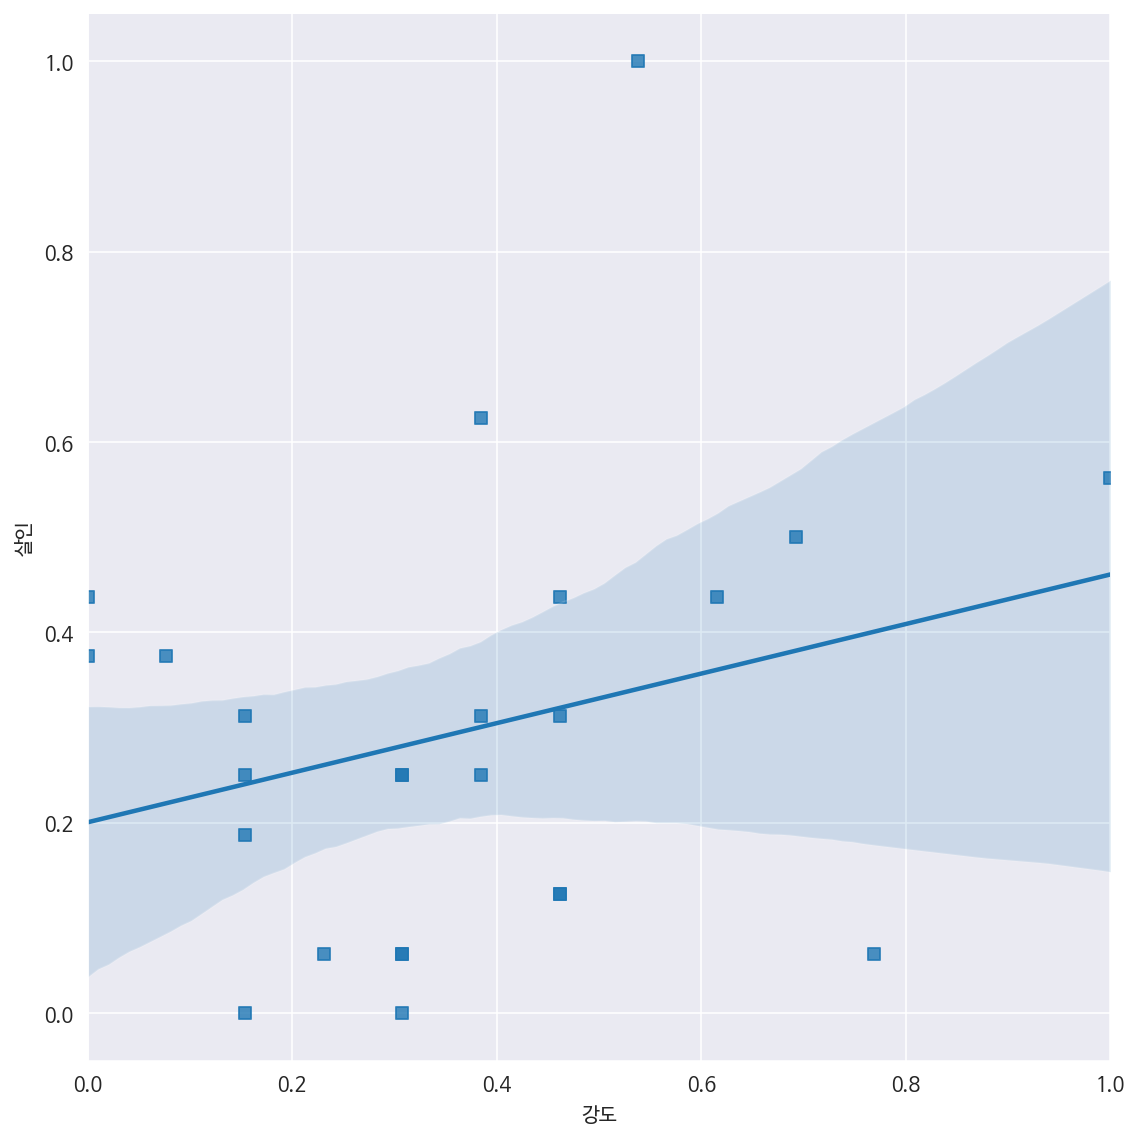

In [ ]:
sns.set_style('darkgrid')
plt.rc('font', family='NanumBarunGothic') 
sns.lmplot( x="강도", y="살인", data=crime2018DF, height=8, markers="s" )
plt.show()

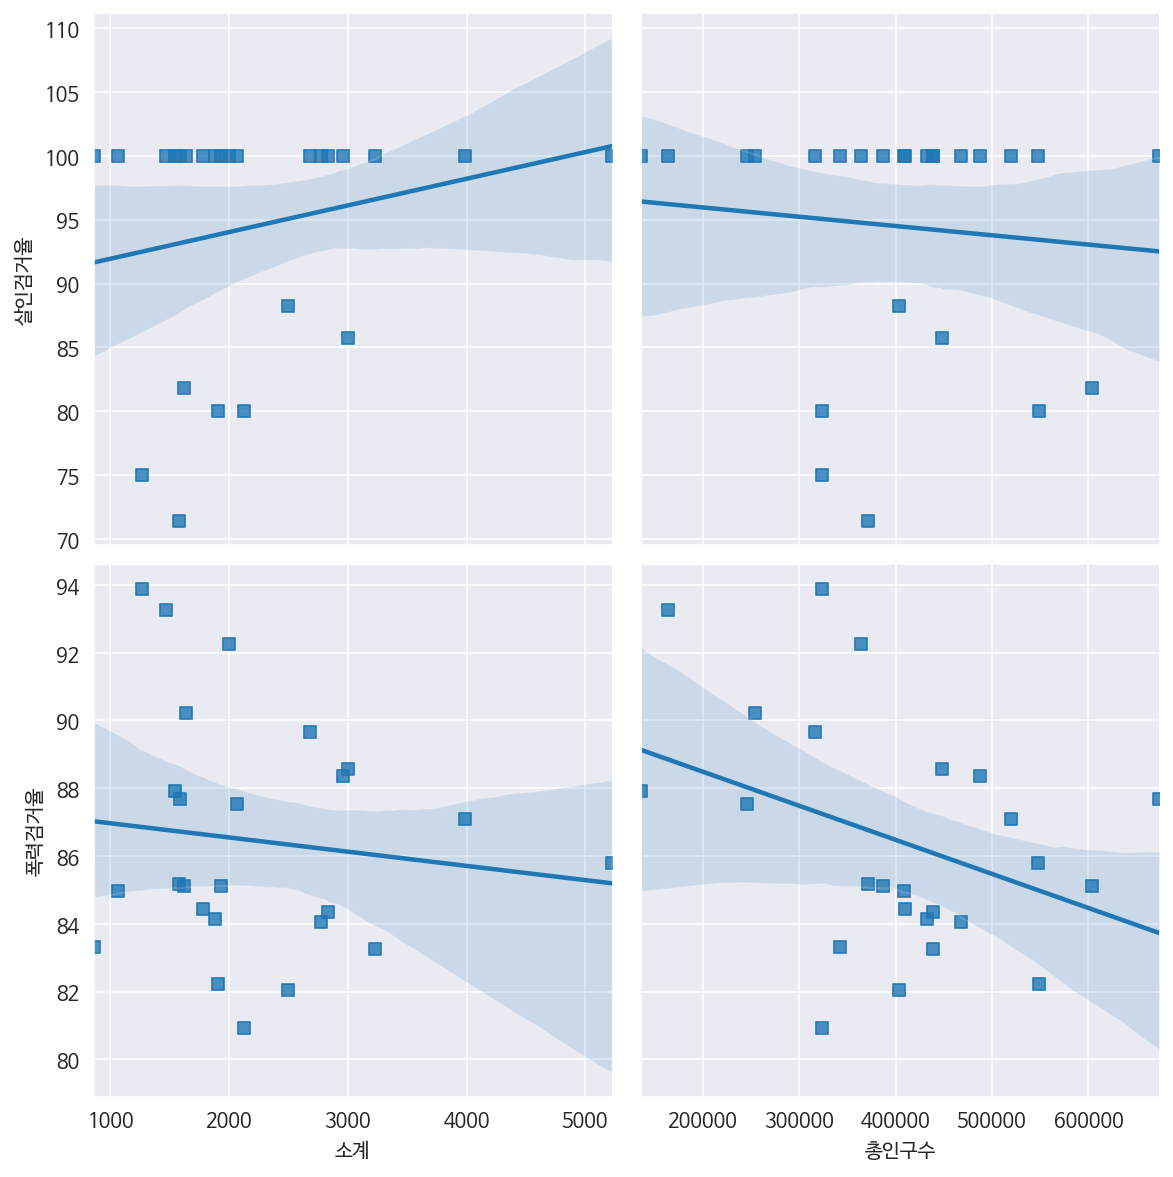

In [ ]:
# cctv와 인구에 따른 살인/폭력검거율의 상관성
# 변수가 2개 이상
sns.pairplot( data=crime2018DF, x_vars = ["소계", "총인구수"], y_vars=["살인검거율", "폭력검거율"], 
             kind="reg", height=4, markers="s")
plt.show()

# x : 소계, 총인구수 / y : 살인검거율, 폭력검거
# 반비례 관계
#   → cctv 증가하면 폭력검거율 감소(아주 약한 상관관계, 기울기 작음)
#   → 총인구수 증가하면 폭력검거율 감소(강한 상관관계)
#   → 총인구수 증가하면 살인검거율 감소(아주 약한 상관관계)

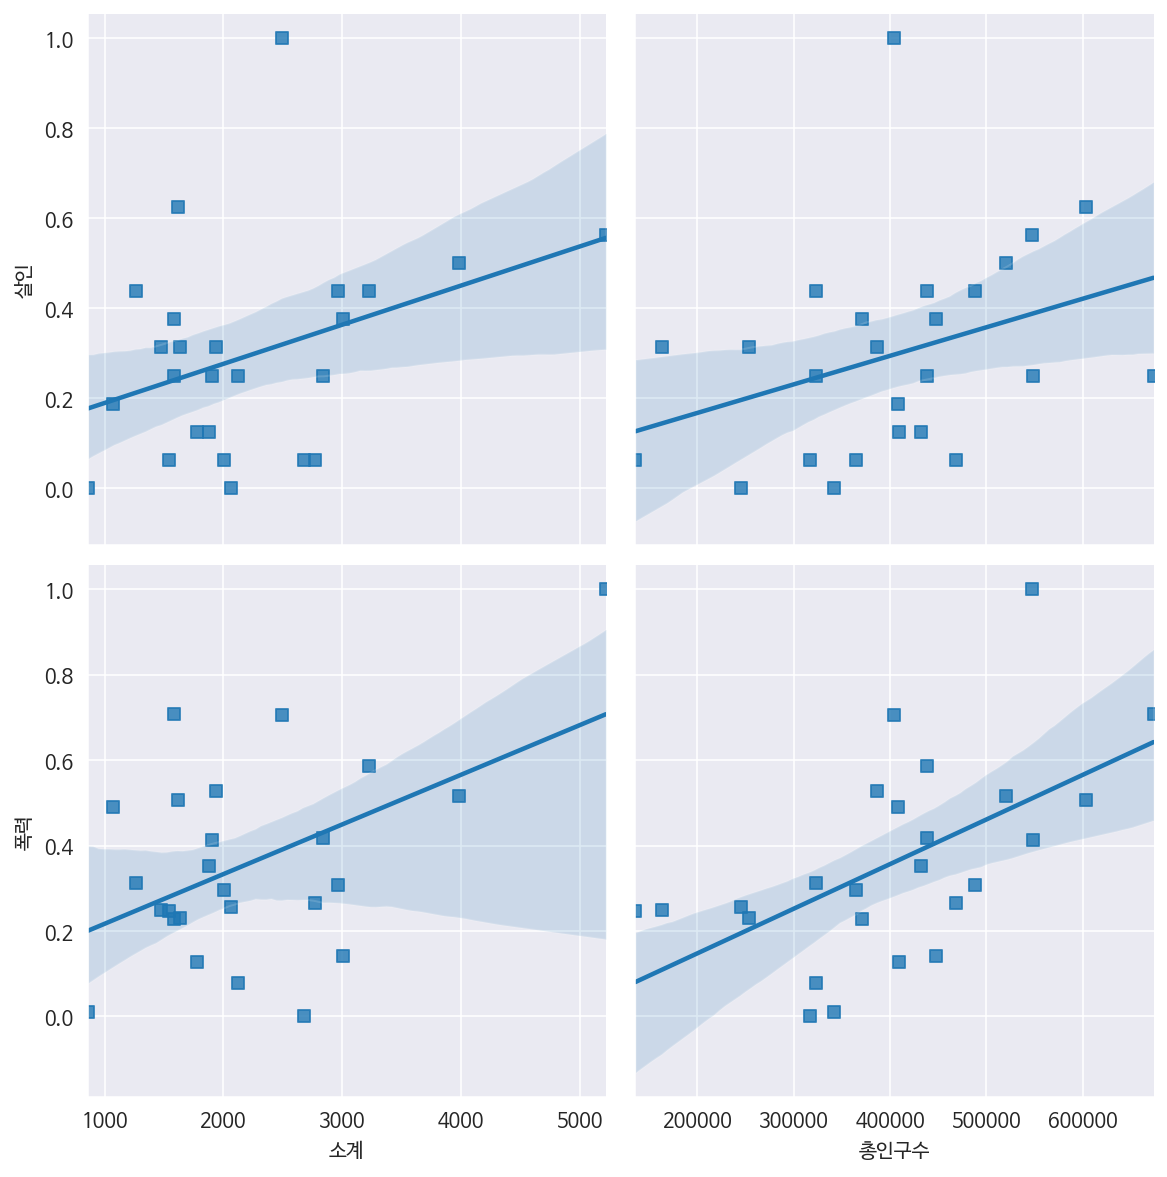

In [ ]:
sns.pairplot( data=crime2018DF, x_vars = ["소계", "총인구수"], y_vars=["살인", "폭력"], 
             kind="reg", height=4, markers="s")
plt.show()

# 총인구가 늘어나면 폭력 사건 증가(상관관계 존재), 기울기값 or 식 통해 값을 확인해 볼 수 O
# cctv가 늘어나서 폭력 사건 증가 or 폭력 사건 증가해서 cctv 설치 증가 → 인과관계에 대한 분석이 좀 더 필요

In [ ]:
crime2018DF.columns

Index(['살인', '강도', '강간강제추행', '절도', '폭력', '살인검거율', '강도검거율', '강간강제추행검거율',
       '절도검거율', '폭력검거율', '총인구수', '소계', '범죄', '검거'],
      dtype='object')

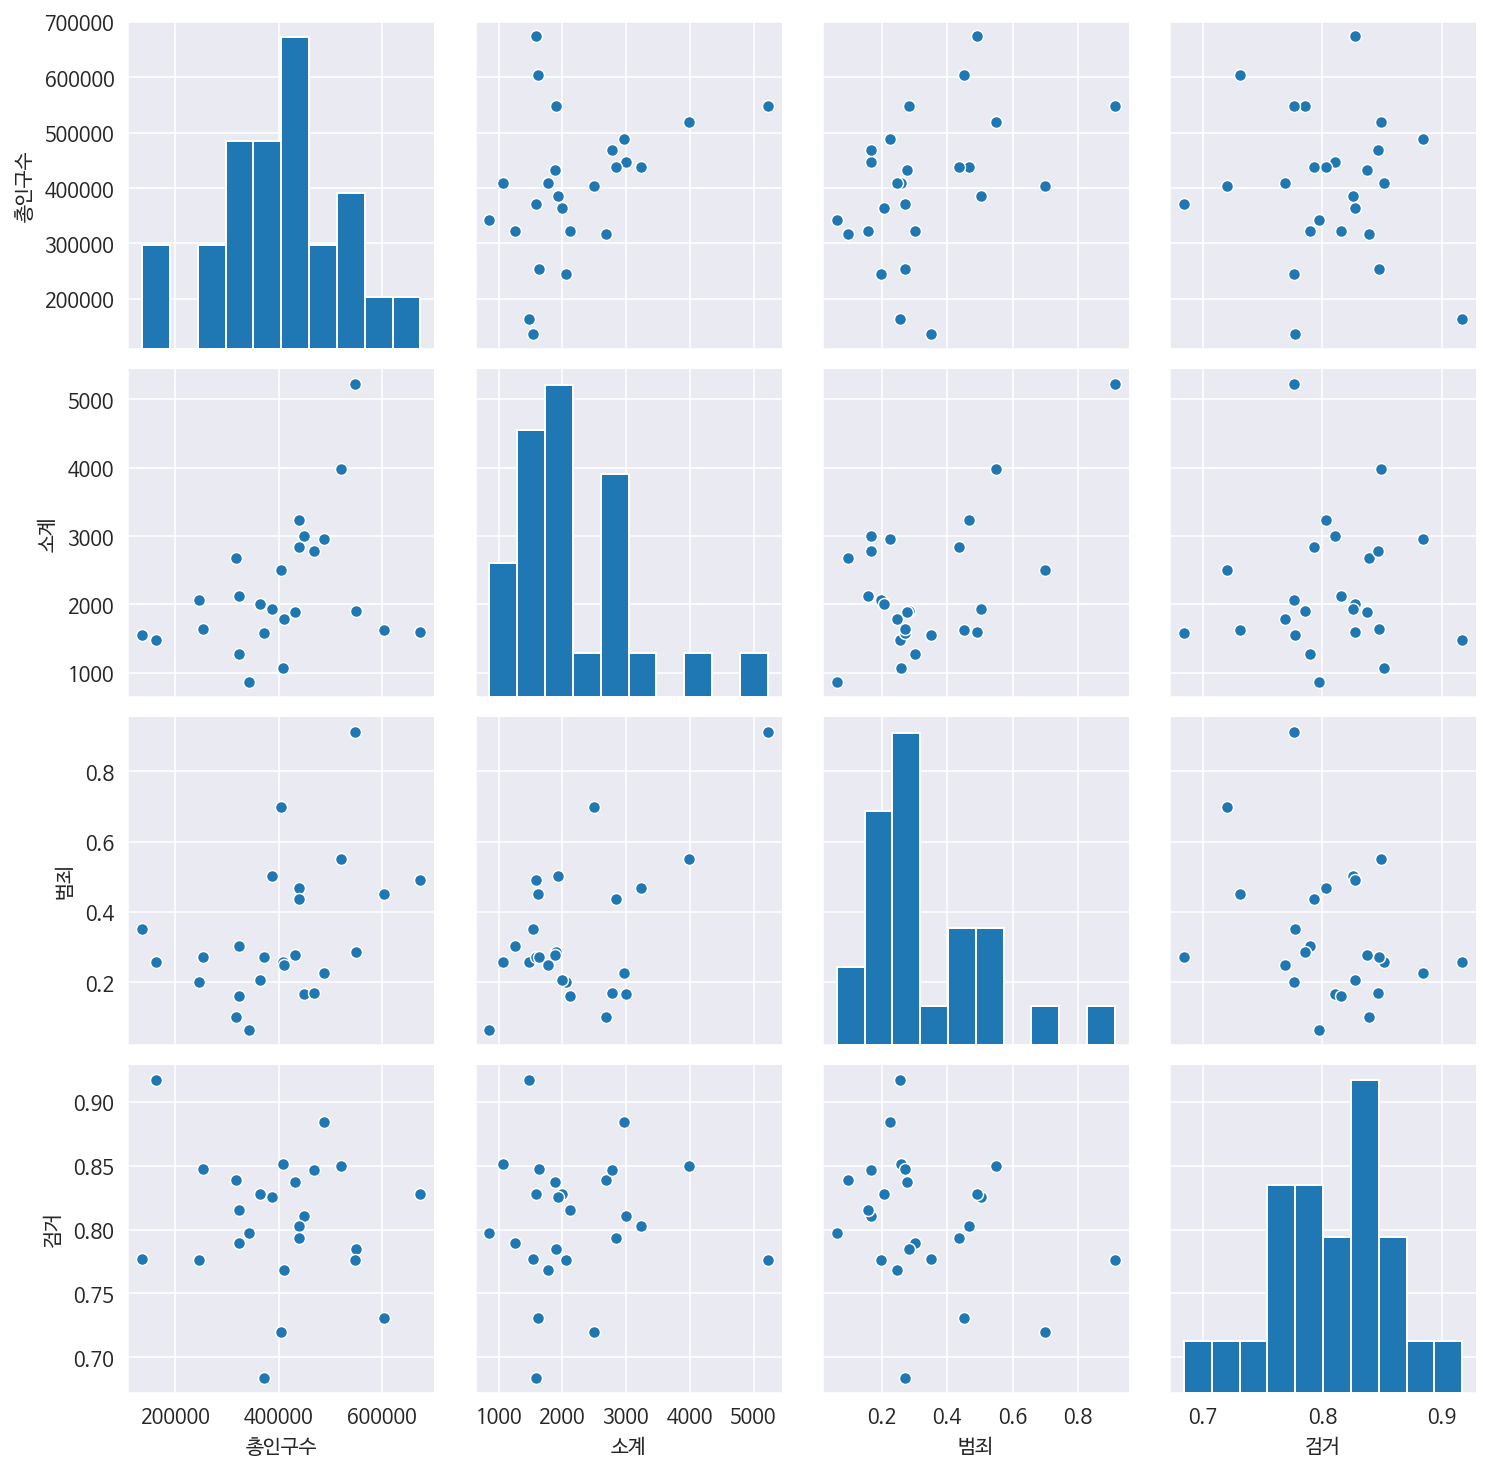

In [ ]:
tmp = crime2018DF[ ['총인구수', '소계', '범죄', '검거'] ]
sns.pairplot(tmp)
# 이런 표현은 이 데이터에서는 적절X → hue를 표현할 수 있으면(종속변수가 있다면) 적극적인 도입

In [ ]:
# 히트맵으로 표현
# 대상은 검거율
# 원데이터를 검거 기준으로 정렬하고, 
tmp = crime2018DF.sort_values(by="검거", ascending=False)[ [ '살인검거율', '강도검거율', '강간강제추행검거율', '절도검거율', '폭력검거율' ] ]
tmp

,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
자치구,,,,,
종로구,100.000000,100.000000,100.000000,65.340526,93.272171
은평구,100.000000,100.000000,89.893617,63.849765,88.368794
중랑구,100.000000,100.000000,83.333333,57.404980,84.967067
관악구,100.000000,100.000000,86.647727,50.944334,87.097995
금천구,100.000000,85.714286,92.500000,55.222603,90.219665
양천구,100.000000,100.000000,92.500000,46.676301,84.039900
성동구,100.000000,100.000000,80.952381,48.748749,89.660377
강동구,100.000000,100.000000,84.117647,50.495050,84.127698
송파구,100.000000,100.000000,82.200647,43.962585,87.687400


In [ ]:
tmp.shape

(25, 5)

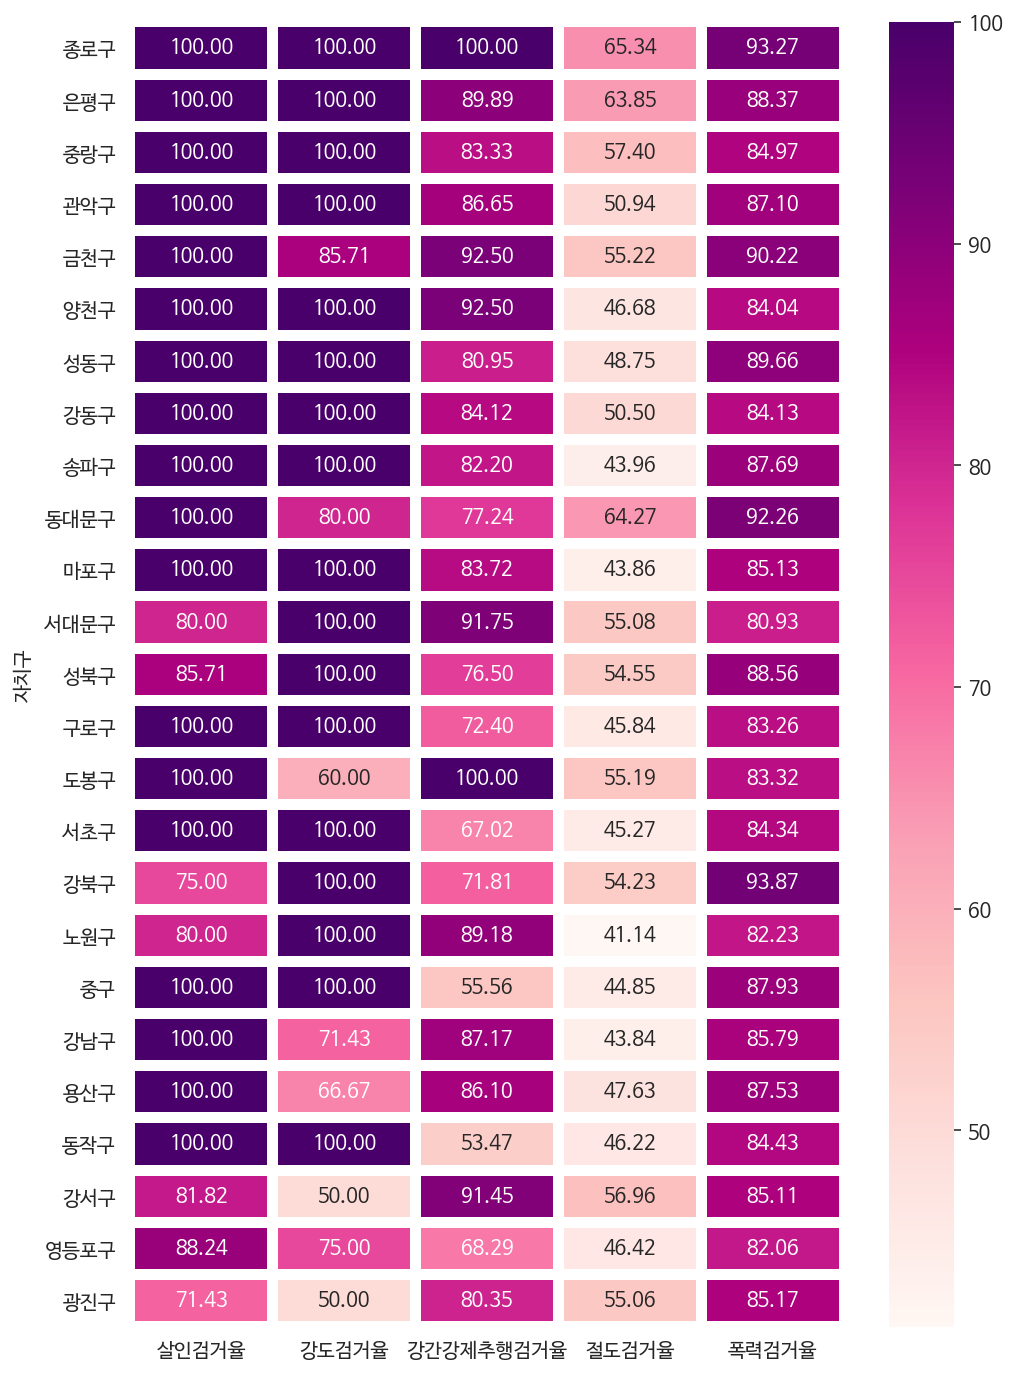

In [ ]:
# 히트맵으로 tmp를 표현하시오
plt.figure( figsize = (8, 12) )
sns.heatmap(tmp, annot=True, fmt='.2f', cmap="RdPu", linewidths=5)

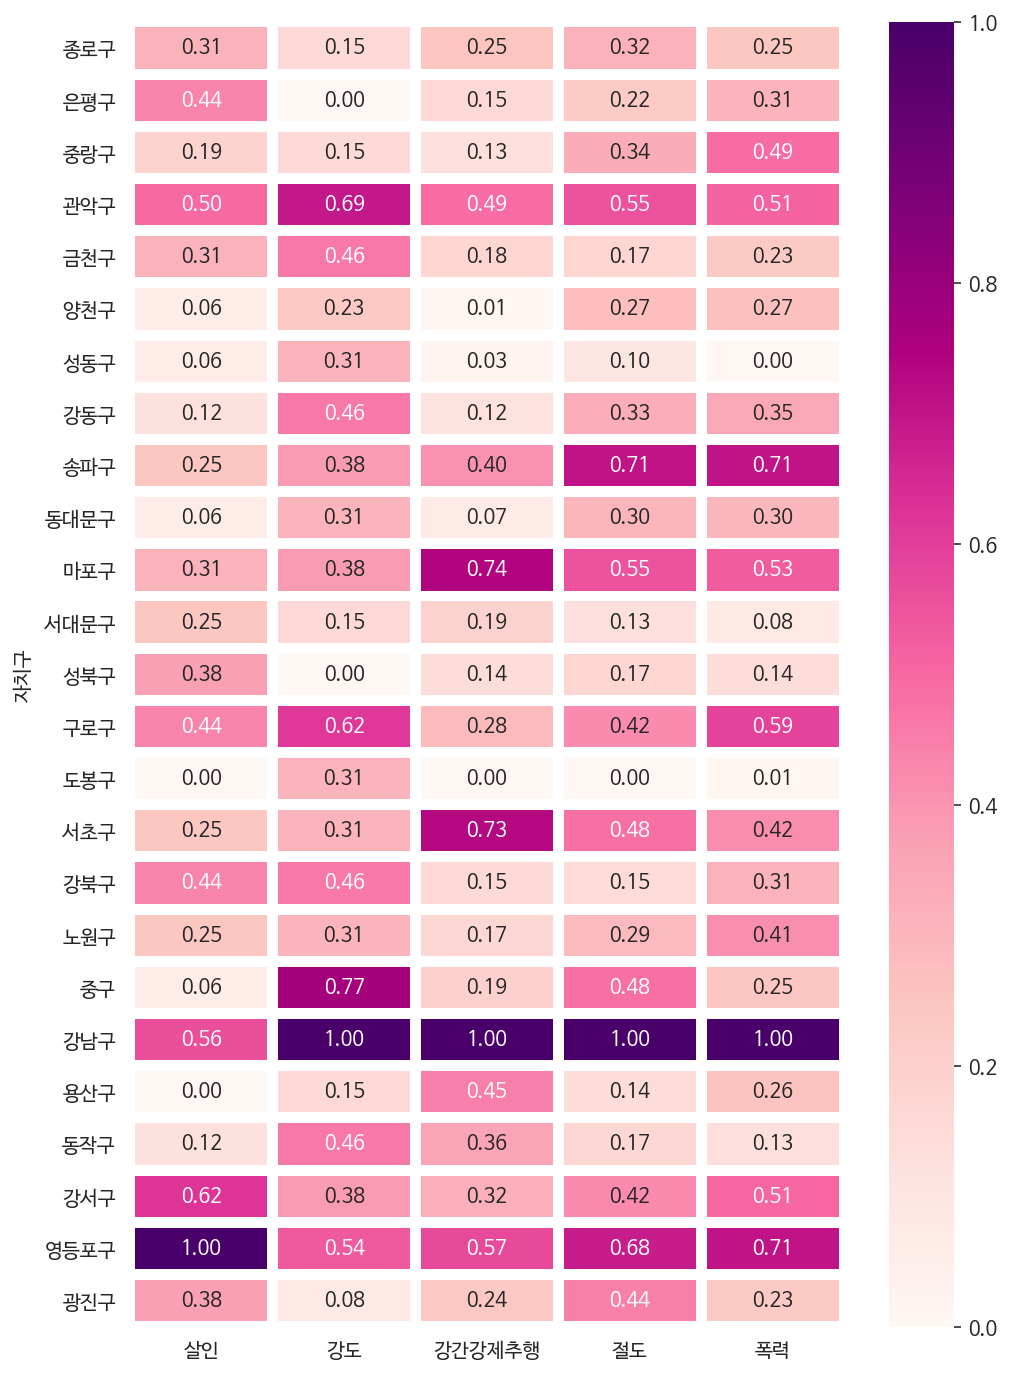

In [ ]:
tmp = crime2018DF.sort_values(by="검거", ascending=False)[ [ '살인', '강도', '강간강제추행', '절도', '폭력' ] ]
plt.figure( figsize = (8, 12) )
sns.heatmap(tmp, annot=True, fmt='.2f', cmap="RdPu", linewidths=5)

# 강남구에서 범죄 발생 多
# 발생 데이터를 이용해 보다 안전한 자치구를 시각적으로 표현 可

## 지도 시각화
- folium 이용해 처리
- 서울시 지도를 자치구 단위로 그림
- 각 자치도를 5대범죄 벌생 or 5대범죄 검거율 기반으로 표현(색상을 칠할 수 O)
  - "절도" 절도 범죄 발생 비율(5대 범죄를 정규화한 값들의 합산) : 0.0 ~ 5.0
- 경찰서를 지도 위에 표현
  - 경찰서 마커를 기반으로 검거율이나 발생율 원으로 표현해 경찰서의 영향력을 표현 可

In [ ]:
# 특정버전으로 설치 → 업그레이드 or 다운그레이드 효과
# !pip install folium == 0.11.0

In [ ]:
import folium

In [ ]:
folium.__version__

'0.8.3'

In [ ]:
crime2018DF['자치구'] = crime2018DF.index
crime2018DF.head(2)

,살인,강도,강간강제추행,절도,폭력,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,총인구수,소계,범죄,검거,자치구
자치구,,,,,,,,,,,,,,,
종로구,0.3125,0.153846,0.252567,0.315789,0.248828,100.0,100.0,100.000000,65.340526,93.272171,163026,1471,0.256706,0.917225,종로구
중구,0.0625,0.769231,0.193018,0.483131,0.246094,100.0,100.0,55.555556,44.851752,87.928389,135633,1544,0.350795,0.776671,중구


In [ ]:
zoom = 11
gps = [37.5502, 126.982]
map  = folium.Map(location=gps, zoom_start=zoom, width='70%', height='70%')

geoJSON = "/content/drive/My Drive/Colab Notebooks/1_Analysis/data/seoul.json"
geo_str = json.load(open(geoJSON, encoding='utf-8'))

map.choropleth( 
    geo_data    = geoJSON,
    data        = crime2018DF,
    columns     = ['자치구', '범죄'],
    key_on      = 'feature.id',
    fill_color   = 'RdPu',
    legend_name = 'crime occur rate(2018)'
    )

map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
zoom = 11
gps = [37.5502, 126.982]
map  = folium.Map(location=gps, zoom_start=zoom, width='70%', height='70%')

geoJSON = "/content/drive/My Drive/Colab Notebooks/1_Analysis/data/seoul.json"
geo_str = json.load(open(geoJSON, encoding='utf-8'))

map.choropleth( 
    geo_data    = geoJSON,
    data        = crime2018DF['범죄'],                         # 데이터가 Series
    columns     = [crime2018DF.index, crime2018DF['범죄']],    # [Series(key_on과 일치), Series(데이터)]
    key_on      = 'feature.id',
    fill_color   = 'YlGn',
    legend_name = 'crime occur rate(2018)'
    )

map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
zoom = 11
gps = [37.5502, 126.982]
map  = folium.Map(location=gps, zoom_start=zoom, width='70%', height='70%')

geoJSON = "/content/drive/My Drive/Colab Notebooks/1_Analysis/data/seoul.json"
geo_str = json.load(open(geoJSON, encoding='utf-8'))

map.choropleth( 
    geo_data    = geoJSON,
    data        = crime2018DF['범죄'],                         # 데이터가 Series
    columns     = [crime2018DF['범죄'], crime2018DF.index],    # [Series(key_on과 일치), Series(데이터)], 순서는 상관 X
    key_on      = 'feature.id',
    fill_color   = 'YlGn',
    legend_name = 'crime occur rate(2018)'
    )

map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
zoom = 11
gps = [37.5502, 126.982]
map  = folium.Map(location=gps, zoom_start=zoom, width='70%', height='70%')

geoJSON = "/content/drive/My Drive/Colab Notebooks/1_Analysis/data/seoul.json"
geo_str = json.load(open(geoJSON, encoding='utf-8'))

map.choropleth( 
    geo_data    = geoJSON,
    data        = crime2018DF['범죄'],                         # 데이터가 Series
    columns     = [crime2018DF['검거'], crime2018DF['범죄']],    # [Series(key_on과 일치), Series(데이터)], 순서는 상관 X
    key_on      = 'feature.id',
    fill_color   = 'YlGn',
    legend_name = 'crime occur rate(2018)'
    )

map

# key와 일치하지 않는데 동일하게 나왔음 → 검증 필요

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
zoom = 11
gps = [37.5502, 126.982]
map  = folium.Map(location=gps, zoom_start=zoom, width='70%', height='70%')

geoJSON = "/content/drive/My Drive/Colab Notebooks/1_Analysis/data/seoul.json"
geo_str = json.load(open(geoJSON, encoding='utf-8'))

map.choropleth( 
    geo_data    = geoJSON,
    data        = crime2018DF,
    columns     = ['자치구', '범죄'],
    key_on      = 'feature.id',
    fill_color   = 'YlGnBu',
    legend_name = 'crime occur rate(2018)'
    )

# 경찰서 마커 추가
# 경찰서명, lat, lng
# crime_cnt_df_2018_25[['위도', '경도', '경찰서명']]

map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
tmp = crime_cnt_df_2018_25[['위도', '경도', '경찰서명']]
tmp

,위도,경도,경찰서명
105,37.57553779077874,126.98489861889408,서울종로경찰서
106,37.56361812722828,126.98958691395208,서울중부경찰서
107,37.54117933635974,126.96777437089538,서울용산경찰서
108,37.5617947420747,127.036472076258,서울성동경찰서
109,37.54292164557882,127.08396170505674,서울광진경찰서
110,37.5850804205685,127.045762797538,서울동대문경찰서
111,37.6182390801576,127.10454224897,서울중랑경찰서
112,37.58989767143614,127.01625465308534,서울성북경찰서
113,37.637406561393085,127.02733870040592,서울강북경찰서
114,37.65339041848567,127.05270598499145,서울도봉경찰서


In [ ]:
zoom = 11
gps = [37.5502, 126.982]
map  = folium.Map(location=gps, zoom_start=zoom, width='70%', height='70%')

geoJSON = "/content/drive/My Drive/Colab Notebooks/1_Analysis/data/seoul.json"
geo_str = json.load(open(geoJSON, encoding='utf-8'))

map.choropleth( 
    geo_data    = geoJSON,
    data        = crime2018DF,
    columns     = ['자치구', '범죄'],
    key_on      = 'feature.id',
    fill_color   = 'YlGnBu',
    legend_name = 'crime occur rate(2018)'
    )

# 경찰서 마커 추가
# 경찰서명, lat, lng
# crime_cnt_df_2018_25[['위도', '경도', '경찰서명']]
# 1개 마킹 샘플
folium.Marker([37.57553779077874, 126.98489861889408	], popup="서울종로경찰서").add_to( map )

map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
# folium 한글 처리(구글링)
# !pip install git+https://github.com/python-visualization/branca.git@master

In [ ]:
zoom = 11
gps = [37.5502, 126.982]
map  = folium.Map(location=gps, zoom_start=zoom, width='70%', height='70%')

geoJSON = "/content/drive/My Drive/Colab Notebooks/1_Analysis/data/seoul.json"
geo_str = json.load(open(geoJSON, encoding='utf-8'))

map.choropleth( 
    geo_data    = geoJSON,
    data        = crime2018DF,
    columns     = ['자치구', '범죄'],
    key_on      = 'feature.id',
    fill_color   = 'YlGnBu',
    legend_name = 'crime rate(2018)'
    )

# 경찰서 마커 추가
# 경찰서명, lat, lng
# crime_cnt_df_2018_25[['위도', '경도', '경찰서명']]
# 실습
for i in range (0, 25) : 
  folium.Marker([tmp['위도'][i:i+1], tmp['경도'][i:i+1]], popup=tmp['경찰서명'][i:i+1]).add_to( map )

map

In [ ]:
# 강의
# 지도 상에 마킹하기 위해 다른 df에서 위도, 경도, 경찰서명 등 데이터 추출

tmp = crime_cnt_df_2018_25[['위도',	'경도',	'경찰서명', '자치구']]
tmp

# 인덱스에 특정 컬럼을 세팅한다
tmp.set_index( '자치구', inplace = True)

In [ ]:
# 검증
# 값 추출 → 스칼라(실제값)
# df(2-D) → 값을 추출 → 인덱싱 * 2번 → df[2차][1차], df.loc[ 1차, 2차 ], df.iloc[ 1차, 2차 ]
tmp['위도']['종로구'], tmp['경도']['종로구'], tmp['경찰서명']['종로구']

('37.57553779077874', '126.98489861889408', '서울종로경찰서')

In [ ]:
zoom = 11
gps = [37.5502, 126.982]
map  = folium.Map(location=gps, zoom_start=zoom, width='70%', height='70%')

geoJSON = "/content/drive/My Drive/Colab Notebooks/1_Analysis/data/seoul.json"
geo_str = json.load(open(geoJSON, encoding='utf-8'))

map.choropleth( 
    geo_data    = geoJSON,
    data        = crime2018DF,
    columns     = ['자치구', '범죄'],
    key_on      = 'feature.id',
    fill_color   = 'YlGnBu',
    legend_name = 'crime rate(2018)'
    )

# 25번 → 자치구의 개수, 데이터의 shape의 1차원의 개수( crime2018DF.shape[0] 또는 crime2018DF.index.shape[0] )
# 25번 마킹해라 = 25회 반복해라 → 반복문(for or while)
for n in crime2018DF.index :
  # lat, lng, name = float(tmp['위도'][n]), float(tmp['경도'][n]), tmp['경찰서명'][n]    → gps값이 문자열인 경우에도 잘 구동됨
  lat, lng, name = tmp['위도'][n], tmp['경도'][n], tmp['경찰서명'][n]
  popup = folium.Popup(name, max_width=100)
  folium.Marker([ lat, lng ], popup=popup ).add_to( map )

map

In [ ]:
zoom = 11
gps = [37.5502, 126.982]
map  = folium.Map(location=gps, zoom_start=zoom, width='70%', height='70%')

geoJSON = "/content/drive/My Drive/Colab Notebooks/1_Analysis/data/seoul.json"
geo_str = json.load(open(geoJSON, encoding='utf-8'))

map.choropleth( 
    geo_data    = geoJSON,
    data        = crime2018DF,
    columns     = ['자치구', '범죄'],
    key_on      = 'feature.id',
    fill_color   = 'YlGnBu',
    legend_name = 'crime rate(2018)'
    )

# 25번 → 자치구의 개수, 데이터의 shape의 1차원의 개수( crime2018DF.shape[0] 또는 crime2018DF.index.shape[0] )
# 25번 마킹해라 = 25회 반복해라 → 반복문(for or while)
for n in crime2018DF.index :
  lat, lng, name = tmp.loc[n, '위도'], tmp.loc[n, '경도'], tmp.loc[n, '경찰서명']
  popup = folium.Popup(name, max_width=100)
  folium.Marker([ lat, lng ], popup=popup ).add_to( map )

map

In [ ]:
zoom = 11
gps = [37.5502, 126.982]
map  = folium.Map(location=gps, zoom_start=zoom, width='70%', height='70%')

geoJSON = "/content/drive/My Drive/Colab Notebooks/1_Analysis/data/seoul.json"

map.choropleth( 
    geo_data    = geoJSON,
    data        = crime2018DF,
    columns     = ['자치구', '범죄'],
    key_on      = 'feature.id',
    fill_color   = 'YlGnBu',
    legend_name = 'crime rate(2018)'
    )

for n in crime2018DF.index :
  lat, lng, name = tmp.loc[n, '위도'], tmp.loc[n, '경도'], tmp.loc[n, '경찰서명']
  popup = folium.Popup(name, max_width=100)
  folium.Marker([ lat, lng ], popup=popup ).add_to( map )

map

In [ ]:
# 검거값 확인
# 검거율을 다 합산/500 → 정규화
# 최댓값 기준으로 정규화를 수행 → 최대값이 1이 되고 나머지는 서열화
maxValue = crime2018DF['검거'].max()
# 제일 검거를 잘 한 자치구 대비 다른 자치구들은서열 관계 표시
tmp_arr = crime2018DF['검거']/maxValue
tmp_arr

자치구
종로구     1.000000
중구      0.846762
용산구     0.845861
성동구     0.914413
광진구     0.745738
동대문구    0.902233
중랑구     0.928246
성북구     0.883817
강북구     0.861094
도봉구     0.868939
노원구     0.855949
은평구     0.964021
서대문구    0.889122
마포구     0.899903
양천구     0.922818
강서구     0.796614
구로구     0.875463
금천구     0.923779
영등포구    0.784977
동작구     0.837584
관악구     0.926032
서초구     0.864862
강남구     0.846528
송파구     0.902397
강동구     0.913059
Name: 검거, dtype: float64

In [ ]:
zoom = 11
gps = [37.5502, 126.982]
map  = folium.Map(location=gps, zoom_start=zoom, width='70%', height='70%')

geoJSON = "/content/drive/My Drive/Colab Notebooks/1_Analysis/data/seoul.json"

map.choropleth( 
    geo_data    = geoJSON,
    data        = crime2018DF,
    columns     = ['자치구', '범죄'],
    key_on      = 'feature.id',
    fill_color   = 'RdPu',
    legend_name = 'crime rate(2018)'
    )

for n in crime2018DF.index :
  lat, lng, name = tmp.loc[n, '위도'], tmp.loc[n, '경도'], tmp.loc[n, '경찰서명']
  tmp_gps = [ lat, lng ]
  popup_m = folium.Popup(name, max_width=100)
  folium.Marker( tmp_gps, popup=popup_m ).add_to( map )

# 값의 구간에 따라 컬러도 상이하게 갈 수 O
# tmp_arr → series
  popup_c = folium.Popup(f'{name}의 검거', max_width=200)
  folium.CircleMarker( tmp_gps, popup=popup_c, radius=(tmp_arr[n]*50), color = "#ffffff", fill_color = "#3116cc").add_to( map )

map

In [ ]:
# 개별데이터 중 실제 검거 데이터
crime_cnt_df_2018_25.head()

,기간,자치구,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,주소,위도,경도,경찰서명,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
105,2018,종로구,6,7,3,7,236,1100,1483,969,1962,1830,서울 종로구 경운동 90-18,37.57553779077874,126.98489861889408,서울종로경찰서,100.000000,100.000000,100.000000,65.340526,93.272171
106,2018,중구,2,2,11,11,207,115,1855,832,1955,1719,서울 중구 저동2가 62-1,37.56361812722828,126.98958691395208,서울중부경찰서,100.000000,100.000000,55.555556,44.851752,87.928389
107,2018,용산구,1,1,3,2,331,285,1096,522,1980,1733,서울 용산구 원효로1가 12-12,37.54117933635974,126.96777437089538,서울용산경찰서,100.000000,66.666667,86.102719,47.627737,87.525253
108,2018,성동구,2,2,5,8,126,102,999,487,1325,1188,서울 성동구 행당동 192-8,37.5617947420747,127.036472076258,서울성동경찰서,100.000000,100.000000,80.952381,48.748749,89.660377
109,2018,광진구,7,5,2,1,229,184,1769,974,1908,1625,서울 광진구 구의동 254-32,37.54292164557882,127.08396170505674,서울광진경찰서,71.428571,50.000000,80.349345,55.059356,85.167715


In [ ]:
crime_cnt_df_2018_25.columns

Index(['기간', '자치구', '살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간강제추행 발생',
       '강간강제추행 검거', '절도 발생', '절도 검거', '폭력 발생', '폭력 검거', '주소', '위도', '경도',
       '경찰서명', '살인검거율', '강도검거율', '강간강제추행검거율', '절도검거율', '폭력검거율'],
      dtype='object')

In [ ]:
# 인덱스가 자치구가 아니여서 설정, 원본 유지, 사본 구함
# cols = [ '자치구', '살인 검거', '강도 검거', '강간강제추행 검거', '절도 검거', '폭력 검거' ] 로 써도 OK
crime_tmp = crime_cnt_df_2018_25.set_index('자치구')
# 시각화 해야하는 재료 데이터만 추출
cols = [ '살인 검거', '강도 검거', '강간강제추행 검거', '절도 검거', '폭력 검거' ]
# 데이터 확인
crime_tmp[cols]

,살인 검거,강도 검거,강간강제추행 검거,절도 검거,폭력 검거
자치구,,,,,
종로구,7,7,1100,969,1830
중구,2,11,115,832,1719
용산구,1,2,285,522,1733
성동구,2,8,102,487,1188
광진구,5,1,184,974,1625
동대문구,2,4,112,930,1920
중랑구,5,3,145,876,2193
성북구,6,2,140,635,1494
강북구,6,7,135,603,1992


In [ ]:
# 5개의 실제 검거 데이터를 기준으로, 각각 항목의 최대값으로 정규화
crime_tmp[cols].max()

살인 검거          15
강도 검거          14
강간강제추행 검거    1100
절도 검거        1317
폭력 검거        3333
dtype: int64

In [ ]:
crime_tmp[cols] / crime_tmp[cols].max()

,살인 검거,강도 검거,강간강제추행 검거,절도 검거,폭력 검거
자치구,,,,,
종로구,0.466667,0.500000,1.000000,0.735763,0.549055
중구,0.133333,0.785714,0.104545,0.631739,0.515752
용산구,0.066667,0.142857,0.259091,0.396355,0.519952
성동구,0.133333,0.571429,0.092727,0.369780,0.356436
광진구,0.333333,0.071429,0.167273,0.739560,0.487549
동대문구,0.133333,0.285714,0.101818,0.706150,0.576058
중랑구,0.333333,0.214286,0.131818,0.665148,0.657966
성북구,0.400000,0.142857,0.127273,0.482156,0.448245
강북구,0.400000,0.500000,0.122727,0.457859,0.597660


In [ ]:
crime_tmp_sum = np.sum(crime_tmp[cols] / crime_tmp[cols].max(), axis = 1)
crime_tmp_sum

자치구
종로구     3.251485
중구      2.171083
용산구     1.384922
성동구     1.523705
광진구     1.799143
동대문구    1.803074
중랑구     2.002551
성북구     1.600531
강북구     2.078246
도봉구     1.051809
노원구     1.812732
은평구     1.938744
서대문구    1.467499
마포구     2.613172
양천구     2.296968
강서구     2.452323
구로구     2.644277
금천구     2.004054
영등포구    3.250273
동작구     1.662190
관악구     3.203369
서초구     2.219195
강남구     4.056407
송파구     2.812238
강동구     1.972222
dtype: float64

In [ ]:
gps     = [37.5511694,126.9860379]
map     = folium.Map( location=gps, zoom_start=10)
geoJson = '/content/drive/My Drive/Colab Notebooks/1_Analysis/data/seoul.json'
map.choropleth( geo_data = geoJson,    
                data     = crime2018DF,    
                columns  = ['자치구','범죄'], 
                key_on   = 'feature.id',
                fill_color ='YlGnBu',      
                legend_name='crime occur 2018 rate (%)'   
               )
for n in crime2018DF.index:
  lat, lng, name = tmp.loc[n,'위도'], tmp.loc[n,'경도'], tmp.loc[n,'경찰서명']
  tmp_gps = [ float(lat),	float(lng) ]
  folium.Marker( tmp_gps, popup=name ).add_to( map )

  # 검거항목중 최대값 기준으로 정규화 하여 서클마커를 경찰서마다 그리시오
  # → 상대적으로 검거를 잘하는 경찰서가 시각화 됨
  # tmp_arrest => series에서 스칼라를 추출 => 차원축소 => 인덱싱 => 변수[인덱스값]
  folium.CircleMarker( tmp_gps, popup=f'{name}의 검거', radius=crime_tmp_sum[n]*10, 
                      # 값의 구간에 따라 칼라도 `상이하게 갈수 있다 
                      color='#3116cc', fill_color='#3116cc' ).add_to( map )              

map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
